# Linear Regression Multivariate Model

The problem involves predicting salary based on experience, test score, and interview score.

Below is the data we will use to build the model:

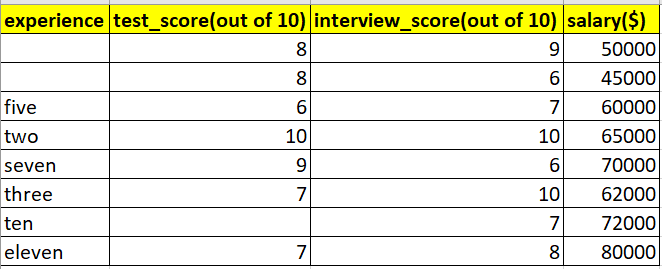


The data presents several challenges:

1. Some columns contain missing values.
Solution: Missing values are filled with the median value of the respective column using the "fillna" method.
2. The "experience" column contains text values.
Solution: Text values are converted to respective numeric values using the "replace" method.


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv("hiring.csv")

In [3]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


The experience column contains text values, which will be replaced with their respective numeric equivalents.

In [4]:
df = df.replace(['five','two','seven','three','ten','eleven'],['5','2','7','3','10','11'])

In [5]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [6]:
import math

In [7]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

The experience column is of object type; to calculate the median, the column should be converted to float type.

In [8]:
df['experience'] = df['experience'].astype(float)

In [9]:
df.dtypes

experience                    float64
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

We'll rename the column names to ensure consistency throughout the dataset.

In [10]:
df.rename(columns = {'test_score(out of 10)':'Test_Score','interview_score(out of 10)':'Interview_Score','salary($)':'salary'}, inplace = True)


First, we'll convert the experience column to float type to calculate the median. Then, we'll compute the median and fill missing values in all columns with this median.

In [11]:
median_experience=df.experience.median()
df.experience = df.experience.fillna(median_experience)
df

,experience,Test_Score,Interview_Score,salary
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [12]:
median_test_score = math.floor(df.Test_Score.median())
median_test_score

8

In [13]:
df.Test_Score = df.Test_Score.fillna(median_test_score)

In [14]:
df

,experience,Test_Score,Interview_Score,salary
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


Now that our data is clean and prepared, it's ready to be fitted into the model.

In [15]:
reg = linear_model.LinearRegression()

In [16]:
#dropping salary column from the table and assigning into new dataframe called "df_new"
#df_new =df.drop('salary',axis='columns')
#Below is the another way of passing independent variables by selectively calling column names
reg.fit(df[['experience','Test_Score','Interview_Score']],df.salary)


LinearRegression()

Coeffients and intercept values

In [17]:
reg.coef_

array([2813.00813008, 1333.33333333, 2926.82926829])

We got 3 values which are coefficients of our 3 independent variables respectively


In [18]:
reg.intercept_

11869.918699186957

Now our model is fitted, we are pridicting salary for following cases
Case1: 2 yr experience, 9 test score, 6 interview score
Case2: 12 yr experience, 10 test score, 10 interview score

In [19]:
reg.predict([[2,9,6]])

C:\Users\vullema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47056.91056911])

In [20]:
reg.predict([[12,10,10]])

C:\Users\vullema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88227.64227642])